In [ ]:
import torch
import unittest
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Задание 1.
( 6 баллов) Напишите функцию, которая моделирует один нейрон с сигмоидной активацией и реализует вычисление градиента для обновления весов и смещений нейрона. Функция должна принимать список векторов признаков, ассоциированные бинарные метки класса, начальные веса, начальное смещение, скорость обучения и количество эпох. Функция должна обновлять веса и смещение с помощью градиентного спуска (классической версии) на основе функции потерь NLL и возвращать обновленные веса, смещение и список значений NLL для каждой эпохи, округленное до четырех десятичных знаков.
Проведите обучение на предоставленном наборе данных из задания 4 (для двух разных лет). Опционально сгенерируйте другие подходящие наборы данных. Опишите ваши результаты. Предоставленная функция будет также протестирована во время защиты ДЗ.
Можно использовать только чистый torch (без использования autograd и torch.nn). 

In [16]:
def train_single_neuron(features, labels, initial_weights, initial_bias, learning_rate, epochs):
    X = torch.tensor(features, dtype=torch.float32)
    y = torch.tensor(labels, dtype=torch.float32).view(-1, 1)
    w = torch.tensor(initial_weights, dtype=torch.float32).view(-1, 1)
    b = torch.tensor([initial_bias], dtype=torch.float32)
    nll_values = []

    for _ in range(epochs):
        z = X @ w + b
        # Sigmoid активация
        y_pred = 1 / (1 + torch.exp(-z))

        
        # NLL loss (бинарная кросс-энтропия)
        loss = -(y * torch.log(y_pred + 1e-8) + (1 - y) * torch.log(1 - y_pred + 1e-8)).mean()
        
        nll_values.append(round(loss.item(), 4))
        
        # Градиенты для NLL
        err = y_pred - y
        grad_w = X.T @ err / len(X)
        grad_b = err.mean()
        
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b

    return w.view(-1).tolist(), b.item(), nll_values


features = [[1.0, 2.0], [2.0, 1.0], [-1.0, -2.0]]
labels = [1, 0, 0]
initial_weights = [0.1, -0.2]
initial_bias = 0.0
learning_rate = 0.1
epochs = 2

weights, bias, nll_values = train_single_neuron(features, labels, initial_weights, initial_bias, learning_rate, epochs)

print(f"Weights: {weights} Bias: {bias} NLL values: {nll_values}")


Weights: [0.10698875039815903, -0.08469319343566895] Bias: -0.033500783145427704 NLL values: [0.8006, 0.7631]


Проведите обучение на предоставленном наборе данных из задания 4 (для двух разных лет)

In [17]:
path = r"C:\Users\Acer\Desktop\Neural_networks\spbu_dl_2025\homeworks\data\YearPredictionMSD.txt"
data = pd.read_csv(path, header=None)

y = torch.tensor(data.iloc[:, 0].values, dtype=torch.float32).view(-1, 1)
X = torch.tensor(data.iloc[:, 1:].values, dtype=torch.float32)

X_train = X[:463715]
y_train = y[:463715]
X_test = X[463715:]
y_test = y[463715:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


torch.Size([463715, 90]) torch.Size([463715, 1])
torch.Size([51630, 90]) torch.Size([51630, 1])


In [18]:
filtered_data = data[(data[0] == 2007) | (data[0] == 2009)]

y_filtered = torch.tensor(filtered_data.iloc[:, 0].values, dtype=torch.float32).view(-1, 1)
X_filtered = torch.tensor(filtered_data.iloc[:, 1:].values, dtype=torch.float32)
print(y_filtered.shape)

X_train = X_filtered[:63397]
y_train = y_filtered[:63397]
X_test = X_filtered[63397:]
y_test = y_filtered[63397:]

y_train_bin = (y_train == 2007).float()
y_test_bin = (y_test == 2007).float()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
features = X_train_scaled.tolist()
labels = y_train_bin.tolist()

initial_weights = [0.0] * X_train.shape[1]
initial_bias = 0.0
learning_rate = 0.5
epochs = 50

weights, bias, nll_values = train_single_neuron(features, labels, initial_weights, initial_bias, learning_rate, epochs)

X_test_scaled = scaler.transform(X_test)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
w = torch.tensor(weights, dtype=torch.float32).view(-1, 1)
b = torch.tensor([bias], dtype=torch.float32)

z = X_test_tensor @ w + b
y_pred_prob = 1 / (1 + torch.exp(-z))
y_pred_class = (y_pred_prob >= 0.4).float()

print("Weights:", weights)
print("Bias:", bias)
print("NLL value:", min(nll_values))
accuracy = (y_pred_class.view(-1) == y_test_bin).float().mean().item()
print("Accuracy on test set:", accuracy)

#plt.plot(range(1, len(nll_values)+1), nll_values)
#plt.xlabel("Epoch")
#plt.ylabel("NLL")
#plt.title("NLL values")
#plt.grid(True)
#plt.show()


torch.Size([70442, 1])
Weights: [-0.07281024008989334, 0.03763687238097191, -0.009667426347732544, 0.02589349076151848, 0.04868444800376892, 0.061330631375312805, -0.012610427103936672, -0.005706720054149628, -0.008375479839742184, 0.005526889115571976, -0.04384564235806465, -0.011046187952160835, 0.0010658912360668182, -0.008906607516109943, -0.013615074567496777, 0.01071798987686634, 0.006855211686342955, 0.0003827405162155628, -0.042783223092556, -0.0019402066245675087, -0.016417289152741432, -0.019231120124459267, -0.017498500645160675, -0.010930322110652924, 0.0173716451972723, -0.01633967086672783, 0.047035977244377136, 0.03459498658776283, 0.000940625206567347, -0.005313227418810129, -0.03444521501660347, -0.015895258635282516, 0.029375741258263588, -0.022251321002840996, -0.017206687480211258, -0.012948760762810707, 0.042415551841259, -0.06908303499221802, -0.024959314614534378, -0.04677252843976021, 0.001548629836179316, -0.00604254612699151, 0.00700376508757472, -0.0055370973

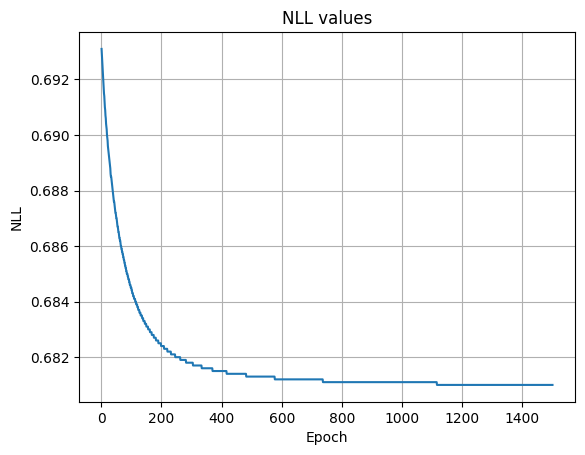 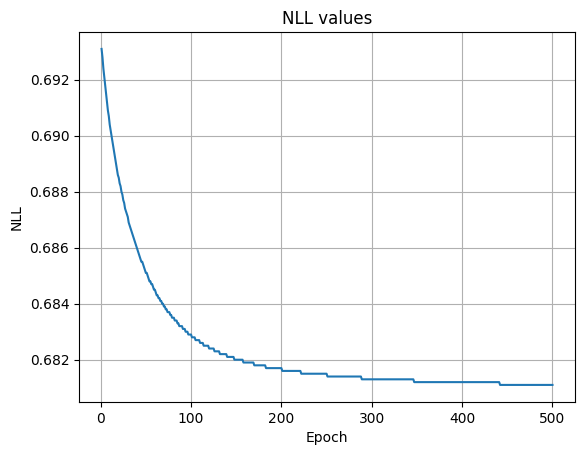 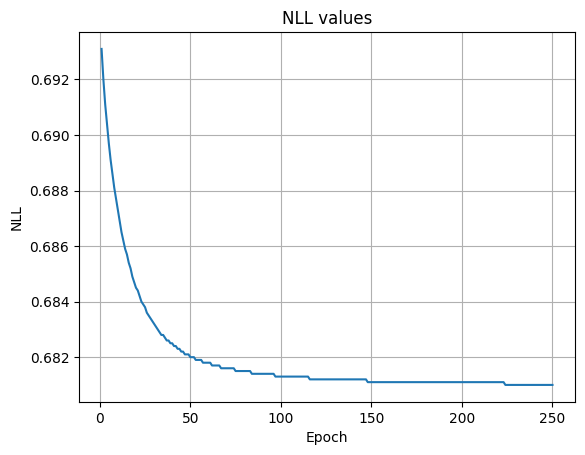 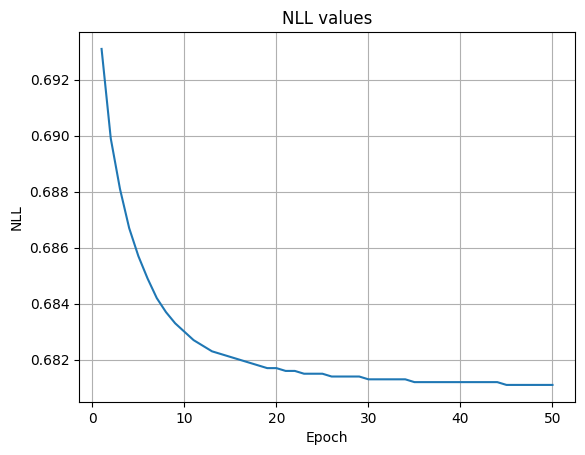

{*} Реализуйте один из следующих видов градиентного спуска: Stochastic Gradient Descent (SGD), Mini-Batch Gradient Descent. Проведите эксперименты, покажите разницу в сходимости, сходимость в зависимости от формы поверхности. (2 балла)

In [19]:
def train_single_neuron_minibatch(features, labels, initial_weights, initial_bias, learning_rate, epochs, batch_size):
    X = torch.tensor(features, dtype=torch.float32)
    y = torch.tensor(labels, dtype=torch.float32).view(-1, 1)
    w = torch.tensor(initial_weights, dtype=torch.float32).view(-1, 1)
    b = torch.tensor([initial_bias], dtype=torch.float32)
    nll_values = []
    n_samples = len(X)

    for _ in range(epochs):
        perm = torch.randperm(n_samples)
        epoch_loss = 0
        #sgd with batch_size and randperm (mixing)
        for i in range(0, n_samples, batch_size):
            idx = perm[i:i + batch_size]
            xi = X[idx]
            yi = y[idx]

            z = xi @ w + b
            y_pred = 1 / (1 + torch.exp(-z))

            loss = -(yi * torch.log(y_pred + 1e-8) + (1 - yi) * torch.log(1 - y_pred + 1e-8)).mean()
            epoch_loss += loss.item() * len(xi)

            err = y_pred - yi
            grad_w = xi.T @ err / len(xi)
            grad_b = err.mean()

            w -= learning_rate * grad_w
            b -= learning_rate * grad_b

        nll_values.append(round(epoch_loss / n_samples, 4))

    return w.view(-1).tolist(), b.item(), nll_values

features = [[1.0, 2.0], [2.0, 1.0], [-1.0, -2.0]]
labels = [1, 0, 0]
initial_weights = [0.1, -0.2]
initial_bias = 0.0
learning_rate = 0.1
epochs = 2
batch_size=1

weights, bias, nll_values = train_single_neuron(features, labels, initial_weights, initial_bias, learning_rate, epochs)

print(f"Weights: {weights} Bias: {bias} NLL values: {nll_values}")

weights, bias, nll_values = train_single_neuron_minibatch(features, labels, initial_weights, initial_bias, learning_rate, epochs, batch_size)

print(f"Weights: {weights} Bias: {bias} NLL values: {nll_values}")


Weights: [0.10698875039815903, -0.08469319343566895] Bias: -0.033500783145427704 NLL values: [0.8006, 0.7631]
Weights: [0.0924384593963623, 0.11631587147712708] Bias: -0.09955242276191711 NLL values: [0.8316, 0.7398]



===== Batch Gradient Descent =====

Weights: [-0.04404601827263832, 0.017561042681336403, -0.008219423703849316, 0.015430722385644913, 0.033320214599370956, 0.0415056087076664, -0.011073942296206951, -0.0026046782732009888, -0.010730578564107418, 0.005360504612326622, -0.02901783585548401, -0.012974532321095467, 0.002062809420749545, -0.00742056081071496, -0.011390015482902527, 0.0007047435501590371, -0.0019670978654175997, 0.003505850210785866, -0.024802247062325478, -0.003459922270849347, -0.007404820527881384, -0.012269753031432629, -0.010718509554862976, -0.00804121419787407, 0.0037022470496594906, -0.013203716836869717, 0.03496185690164566, 0.026162315160036087, 0.0019205096177756786, 0.002953739371150732, -0.024690205231308937, -0.012185653671622276, 0.0189162939786911, -0.01452209334820509, -0.011062394827604294, -0.006525658071041107, 0.03396810218691826, -0.04926183074712753, -0.01099478080868721, -0.031238269060850143, 0.007306942716240883, -0.006720056291669607, 0.004876129

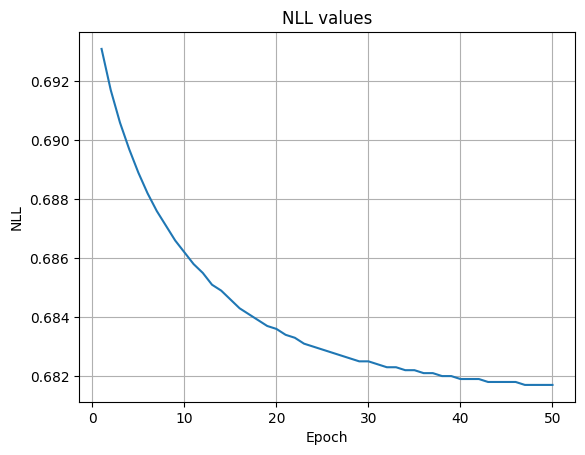


===== Mini-Batch Gradient Descent =====

Weights: [-0.04965175315737724, 0.021168000996112823, -0.008889184333384037, 0.017901819199323654, 0.03696347400546074, 0.04579899460077286, -0.011721375398337841, -0.003424079390242696, -0.010502425022423267, 0.005844672676175833, -0.03190998360514641, -0.01274904329329729, 0.0022752447985112667, -0.0073056574910879135, -0.011695333756506443, 0.0022432736586779356, -0.00040033768163993955, 0.003425839589908719, -0.0278382059186697, -0.003251338843256235, -0.008952682837843895, -0.013490675017237663, -0.011986149474978447, -0.008765854872763157, 0.006522672716528177, -0.014075319282710552, 0.03766888752579689, 0.028005313128232956, 0.002155667869374156, 0.0019233969505876303, -0.026960305869579315, -0.013118480332195759, 0.021042034029960632, -0.015979686751961708, -0.012471865862607956, -0.007622336503118277, 0.03622250631451607, -0.05362364277243614, -0.013498354703187943, -0.034967467188835144, 0.006324345711618662, -0.006629036273807287, 0.

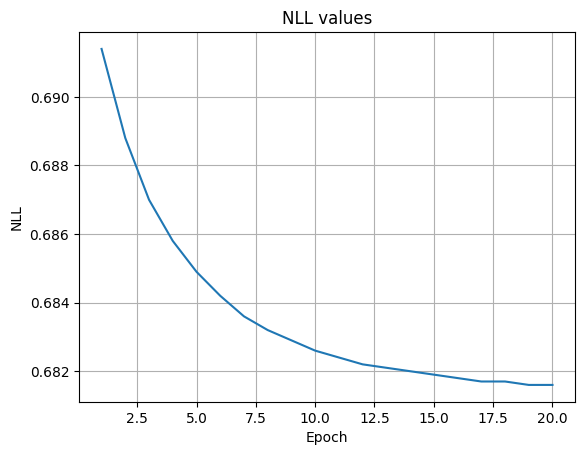

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
features, labels = X_train_scaled.tolist(), y_train_bin.tolist()

def train_and_eval(train_fn, lr, epochs, batch_size=None, title=""):
    initial_weights = [0.0] * X_train.shape[1]
    initial_bias = 0.0
    if batch_size:
        weights, bias, nll_values = train_fn(features, labels, initial_weights, initial_bias, lr, epochs, batch_size)
    else:
        weights, bias, nll_values = train_fn(features, labels, initial_weights, initial_bias, lr, epochs)

    X_test_tensor = torch.tensor(scaler.transform(X_test), dtype=torch.float32)
    w, b = torch.tensor(weights, dtype=torch.float32).view(-1, 1), torch.tensor([bias], dtype=torch.float32)
    z = X_test_tensor @ w + b
    y_pred_class = (1 / (1 + torch.exp(-z)) >= 0.5).float()
    accuracy = (y_pred_class.view(-1) == y_test_bin).float().mean().item()

    print(f"\n===== {title} =====\n")
    print("Weights:", weights)
    print("Bias:", bias)
    print("NLL value:", min(nll_values))
    print("Accuracy on test set:", accuracy)

    plt.plot(range(1, len(nll_values)+1), nll_values)
    plt.xlabel("Epoch")
    plt.ylabel("NLL")
    plt.title("NLL values")
    plt.grid(True)
    plt.show()

train_and_eval(train_single_neuron, lr=0.2, epochs=50, title="Batch Gradient Descent")
train_and_eval(train_single_neuron_minibatch, lr=0.00096, epochs=20, batch_size=100, title="Mini-Batch Gradient Descent")


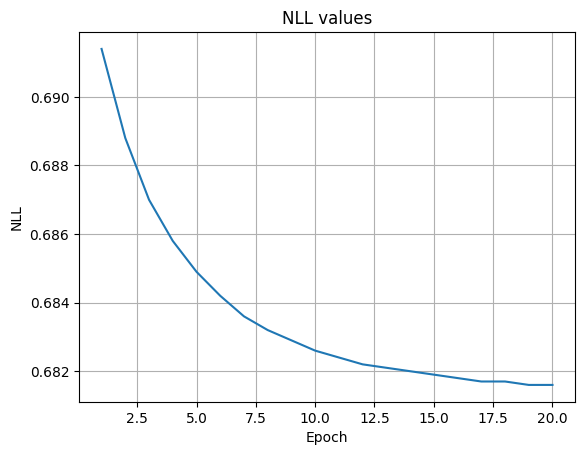

===== Batch Gradient Descent =====
- learning_rate = 0.2
- epochs = 50
- Bias: 0.2193000465631485
- NLL values: 0.6817
- Accuracy on test set: 0.5526394844055176

===== Mini-Batch Gradient Descent =====
- learning_rate = 0.00096
- epochs = 20
- batch_size = 100
- Bias: 0.2265402227640152
- NLL values: 0.6816
- Accuracy on test set: 0.5529235005378723

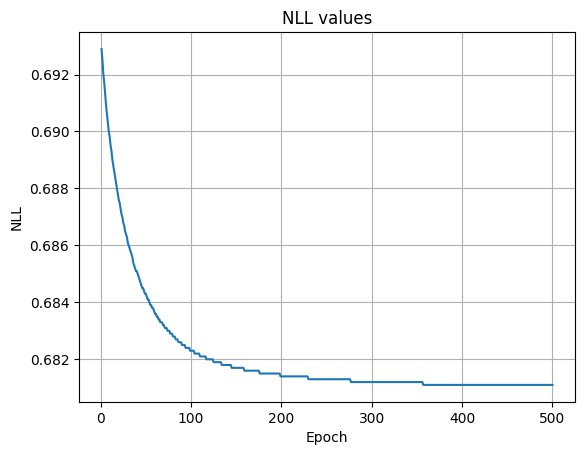 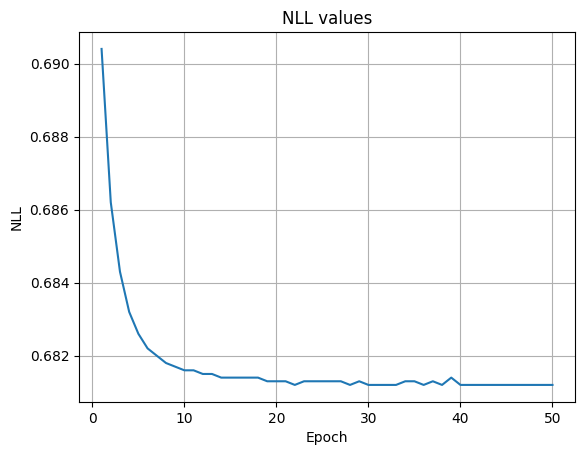

## Задание 2. {*}
(10 баллов) Реализуйте базовые функции autograd. Можете вдохновиться видео от Andrej Karpathy. Напишите класс, аналогичный предоставленному классу 'Element', который реализует основные операции autograd: сложение, умножение и активацию ReLU. Класс должен обрабатывать скалярные объекты и правильно вычислять градиенты для этих операций посредством автоматического дифференцирования. Плюсом будет набор предоставленных тестов, оценивающих правильность вычислений. Большим плюсом будет, если тесты будут   написаны с помощью unittest. Можно использовать только чистый torch (без использования autograd и torch.nn). За каждую нереализованную операцию будет вычитаться 3 балла.

In [21]:
class Node:
    def __init__(self, data, _children=(), _op=''):
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op

    def __repr__(self):
        return f"Element(data={self.data}, grad={self.grad})"

    def __add__(self, other):
        other = other if isinstance(other, Node) else Node(other)
        out = Node(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1 * out.grad
            other.grad += 1 * out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Node) else Node(other)
        out = Node(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out

    def relu(self):
        out = Node(self.data if self.data > 0 else 0, (self,), 'ReLU')

        def _backward():
            self.grad += (out.data > 0) * out.grad
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)

        build_topo(self)
        self.grad = 1
        for node in reversed(topo):
            node._backward()

class TestNode(unittest.TestCase):
    def test_basic(self):
        a = Node(2)
        b = Node(-3)
        c = Node(10)
        d = a + b * c
        e = d.relu()
        e.backward()
        self.assertEqual(a.data, 2)
        self.assertEqual(b.data, -3)
        self.assertEqual(c.data, 10)
        self.assertEqual(d.data, -28)
        self.assertEqual(e.data, 0)
        self.assertEqual(a.grad, 0)
        self.assertEqual(b.grad, 0)
        self.assertEqual(c.grad, 0)
        self.assertEqual(d.grad, 0)
        self.assertEqual(e.grad, 1)

    def test_add_mul(self):
        x = Node(3)
        y = Node(4)
        z = x * y + x
        z.backward()
        self.assertEqual(x.grad, 5)
        self.assertEqual(y.grad, 3)
        self.assertEqual(z.data, 15)

    def test_relu_positive(self):
        x = Node(5)
        y = x.relu()
        y.backward()
        self.assertEqual(x.grad, 1)

    def test_relu_negative(self):
        x = Node(-2)
        y = x.relu()
        y.backward()
        self.assertEqual(x.grad, 0)

unittest.main(argv=[''], exit=False)


.....
----------------------------------------------------------------------
Ran 5 tests in 0.004s

OK


### Задание 3.
#### Реализуйте один из оптимизаторов на выбор. Придумайте и напишите тесты для проверки выбранного оптимизатора. Проведите обучение нейрона из первого задания с использованием оптимизатора, а не ванильного градиентного спуска. Также опишите идею алгоритма (+1 балл). {*} Можете реализовать более 1 алгоритма. Каждый следующий даст 1 балл.

#### Варианты:

- Momentum (3 балла)
- Nesterov (3 балла)
- Adagrad (4 балла)
- Adadelta (4 балла)
- RMSProp (5 баллов)
- Adam (5 баллов)
- Nadam (6 баллов)
- NAG (6 баллов)
- AdamW (6 баллов)

In [22]:
class AdamW:
    def __init__(self, params, lr=0.001, betas=(0.9, 0.999), eps=1e-8, weight_decay=0.01):
        self.params = params
        self.lr = lr
        self.beta1, self.beta2 = betas
        self.eps = eps
        self.weight_decay = weight_decay
        self.m = [torch.zeros_like(p) for p in params]
        self.v = [torch.zeros_like(p) for p in params]
        self.t = 0

    def step(self, grads):
        self.t += 1
        updated_params = []
        for i, (p, g) in enumerate(zip(self.params, grads)):
            self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * g
            self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * g * g
            m_hat = self.m[i] / (1 - self.beta1 ** self.t)
            v_hat = self.v[i] / (1 - self.beta2 ** self.t)
            update = self.lr * m_hat / (torch.sqrt(v_hat) + self.eps)
            p = p - update - self.lr * self.weight_decay * p
            updated_params.append(p)
        self.params = updated_params
        return self.params
    
def test_adamw():
    w = torch.tensor([1.0])
    b = torch.tensor([0.0])
    params = [w, b]
    opt = AdamW(params, lr=0.1, weight_decay=0.0, betas=(0.9, 0.999), eps=1e-8)

    grads_step1 = [torch.tensor([0.1]), torch.tensor([0.2])]
    updated_params = opt.step(grads_step1)

    assert len(updated_params) == 2
    assert all(isinstance(p, torch.Tensor) for p in updated_params)
    
    # Check that parameters decreased in the direction of the gradient
    assert updated_params[0] < w
    assert updated_params[1] < b

    # Second step with the same gradient
    grads_step2 = [torch.tensor([0.1]), torch.tensor([0.2])]
    updated_params2 = opt.step(grads_step2)
    # Check that parameters were updated again (continue moving in gradient direction)
    assert all(u2 < u1 for u1, u2 in zip(updated_params, updated_params2))

    # Check bias correction: m_hat and v_hat should increase on the second step
    # Here we compare internal m and v (not exact, but shows expected trend)

    assert all(torch.all(m > 0) for m in opt.m)
    assert all(torch.all(v > 0) for v in opt.v)

    print("AdamW test passed")

test_adamw()


def train_single_neuron_adamw(features, labels, initial_weights, initial_bias, lr=0.01, epochs=100):
    X = torch.tensor(features, dtype=torch.float32)
    y = torch.tensor(labels, dtype=torch.float32).view(-1, 1)
    w = torch.tensor(initial_weights, dtype=torch.float32).view(-1, 1)
    b = torch.tensor([initial_bias], dtype=torch.float32)

    opt = AdamW([w, b], lr=lr, weight_decay=0.01)
    nll_values = []

    for _ in range(epochs):
        z = X @ w + b
        y_pred = 1 / (1 + torch.exp(-z))
        loss = -(y * torch.log(y_pred + 1e-8) + (1 - y) * torch.log(1 - y_pred + 1e-8)).mean()
        nll_values.append(round(loss.item(), 4))

        err = y_pred - y
        grad_w = X.T @ err / len(X)
        grad_b = err.mean()
        w, b = opt.step([grad_w, grad_b])
        w = w.clone().detach()
        b = b.clone().detach()

    return w.view(-1).tolist(), b.item(), nll_values


features = [[1.0, 2.0], [2.0, 1.0], [-1.0, -2.0]]
labels = [1, 0, 0]
initial_weights = [0.1, -0.2]
initial_bias = 0.0
weights, bias, nll_values = train_single_neuron_adamw(features, labels, initial_weights, initial_bias, lr=0.1, epochs=50)

print(f"Weights: {weights} Bias: {bias} NLL values: {nll_values[-5:]}")


AdamW test passed
Weights: [-2.4447977542877197, 2.9457664489746094] Bias: -0.9017595052719116 NLL values: [0.056, 0.0543, 0.0526, 0.0511, 0.0497]


Weights: [-0.028041573241353035, 0.0071455431170761585, -0.005513960495591164, 0.007356174290180206, 0.020562641322612762, 0.02760019525885582, -0.008188378065824509, -0.0007073521846905351, -0.009727341122925282, 0.002341065090149641, -0.019504819065332413, -0.010505078360438347, 0.0011083695571869612, -0.007473611738532782, -0.008922699838876724, -0.0014272972475737333, -0.004657835699617863, 0.002907172776758671, -0.015462765470147133, -0.003080902388319373, -0.0032110530883073807, -0.0081587303429842, -0.006461627781391144, -0.0048981355503201485, -0.0031335989478975534, -0.009236187674105167, 0.024669606238603592, 0.018226737156510353, -1.3058488548267633e-05, 0.004181322176009417, -0.016552938148379326, -0.00810103490948677, 0.01193399541079998, -0.009434799663722515, -0.006585942581295967, -0.0021164061035960913, 0.025475449860095978, -0.03392712026834488, -0.005195503123104572, -0.01780581846833229, 0.008435810916125774, -0.006427584681659937, 0.0006513771368190646, 9.949281229

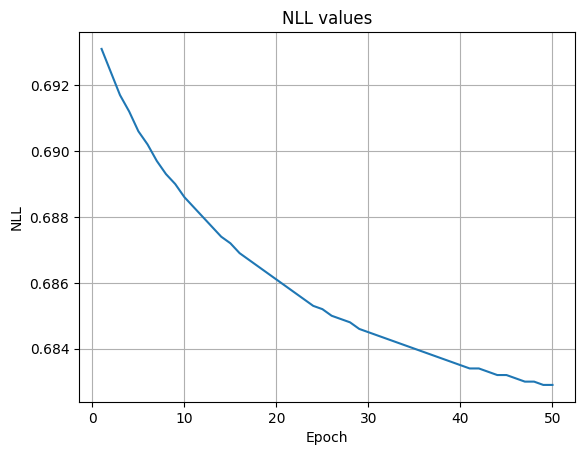

Weights: [-0.10119258612394333, 0.05852503329515457, -0.0057763587683439255, 0.026401564478874207, 0.05581723153591156, 0.07363231480121613, -0.007328344509005547, -0.005191081203520298, -0.002286397386342287, 0.0006010399665683508, -0.043144065886735916, -0.01310567744076252, -0.006148684304207563, -0.014810306951403618, -0.01946191117167473, 0.04419196397066116, 0.014011548832058907, -0.00518428348004818, -0.06413288414478302, 0.011243798770010471, -0.02829827181994915, -0.026979774236679077, -0.02205430343747139, -0.011300481855869293, 0.02621043287217617, -0.015758555382490158, 0.05830564722418785, 0.03857855871319771, -0.0001794843701645732, -0.015694472938776016, -0.03846466913819313, -0.01670694351196289, 0.04050964489579201, -0.03044847398996353, -0.019021863117814064, -0.012073325924575329, 0.04464469850063324, -0.07766592502593994, -0.035699162632226944, -0.053362131118774414, -0.0030829226598143578, -0.007686908356845379, 0.008040438406169415, -0.008082018233835697, -0.00273

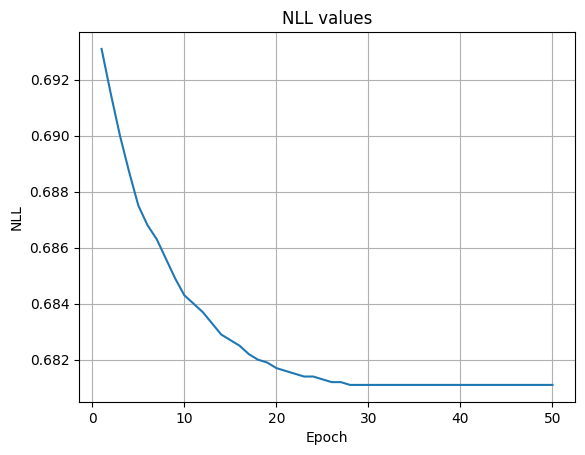

In [23]:
features, labels = X_train_scaled.tolist(), y_train_bin.tolist()

def train_and_evaluate(train_fn, lr, epochs):
    weights = [0.0] * X_train.shape[1]
    bias = 0.0
    w, b, nll_values = train_fn(features, labels, weights, bias, lr, epochs)
    X_test_scaled = scaler.transform(X_test)
    X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
    w_tensor = torch.tensor(w, dtype=torch.float32).view(-1, 1)
    b_tensor = torch.tensor([b], dtype=torch.float32)
    z = X_test_tensor @ w_tensor + b_tensor
    y_pred = (1 / (1 + torch.exp(-z)) >= 0.4).float()
    acc = (y_pred.view(-1) == y_test_bin).float().mean().item()
    print("Weights:", w)
    print("Bias:", b)
    print("NLL value:", min(nll_values))
    print("Accuracy on test set:", acc)
    plt.plot(range(1, len(nll_values)+1), nll_values)
    plt.xlabel("Epoch")
    plt.ylabel("NLL")
    plt.title("NLL values")
    plt.grid(True)
    plt.show()

train_and_evaluate(train_single_neuron, lr=0.1, epochs=50)
train_and_evaluate(train_single_neuron_adamw, lr=0.01, epochs=50)


In [24]:
class Momentum:
    def __init__(self, params, lr=0.01, momentum=0.9):
        self.params = params
        self.lr = lr
        self.momentum = momentum
        self.v = [torch.zeros_like(p) for p in params]

    def step(self, grads):
        for i, (p, g) in enumerate(zip(self.params, grads)):
            self.v[i] = self.momentum * self.v[i] - self.lr * g
            p += self.v[i]
        return self.params

class Nesterov:
    def __init__(self, params, lr=0.01, momentum=0.9):
        self.params = params
        self.lr = lr
        self.momentum = momentum
        self.v = [torch.zeros_like(p) for p in params]

    def step(self, grads):
        for i, (p, g) in enumerate(zip(self.params, grads)):
            v_prev = self.v[i].clone()
            self.v[i] = self.momentum * self.v[i] - self.lr * g
            p += -self.momentum * v_prev + (1 + self.momentum) * self.v[i]
        return self.params

class Adagrad:
    def __init__(self, params, lr=0.01, eps=1e-8):
        self.params = params
        self.lr = lr
        self.eps = eps
        self.h = [torch.zeros_like(p) for p in params]

    def step(self, grads):
        updated = []
        for i, (p, g) in enumerate(zip(self.params, grads)):
            self.h[i] += g * g
            p = p - self.lr * g / (torch.sqrt(self.h[i]) + self.eps)
            updated.append(p)
        self.params = updated
        return self.params

class Adadelta:
    def __init__(self, params, rho=0.95, eps=1e-6):
        self.params = params
        self.rho = rho
        self.eps = eps
        self.Eg2 = [torch.zeros_like(p) for p in params]
        self.Ed2 = [torch.zeros_like(p) for p in params]

    def step(self, grads):
        updated = []
        for i, (p, g) in enumerate(zip(self.params, grads)):
            self.Eg2[i] = self.rho * self.Eg2[i] + (1 - self.rho) * g * g
            delta = - torch.sqrt(self.Ed2[i] + self.eps) / torch.sqrt(self.Eg2[i] + self.eps) * g
            self.Ed2[i] = self.rho * self.Ed2[i] + (1 - self.rho) * delta * delta
            p = p + delta
            updated.append(p)
        self.params = updated
        return self.params

class RMSProp:
    def __init__(self, params, lr=0.01, rho=0.9, eps=1e-8):
        self.params = params
        self.lr = lr
        self.rho = rho
        self.eps = eps
        self.Eg2 = [torch.zeros_like(p) for p in params]

    def step(self, grads):
        updated = []
        for i, (p, g) in enumerate(zip(self.params, grads)):
            self.Eg2[i] = self.rho * self.Eg2[i] + (1 - self.rho) * g * g
            p = p - self.lr * g / (torch.sqrt(self.Eg2[i]) + self.eps)
            updated.append(p)
        self.params = updated
        return self.params

class Adam:
    def __init__(self, params, lr=0.001, betas=(0.9, 0.999), eps=1e-8):
        self.params = params
        self.lr = lr
        self.beta1, self.beta2 = betas
        self.eps = eps
        self.m = [torch.zeros_like(p) for p in params]
        self.v = [torch.zeros_like(p) for p in params]
        self.t = 0

    def step(self, grads):
        self.t += 1
        updated = []
        for i, (p, g) in enumerate(zip(self.params, grads)):
            self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * g
            self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * g * g
            m_hat = self.m[i] / (1 - self.beta1 ** self.t)
            v_hat = self.v[i] / (1 - self.beta2 ** self.t)
            p = p - self.lr * m_hat / (torch.sqrt(v_hat) + self.eps)
            updated.append(p)
        self.params = updated
        return self.params

class Nadam:
    def __init__(self, params, lr=0.001, betas=(0.9, 0.999), eps=1e-8):
        self.params = params
        self.lr = lr
        self.beta1, self.beta2 = betas
        self.eps = eps
        self.m = [torch.zeros_like(p) for p in params]
        self.v = [torch.zeros_like(p) for p in params]
        self.t = 0

    def step(self, grads):
        self.t += 1
        updated = []
        for i, (p, g) in enumerate(zip(self.params, grads)):
            self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * g
            self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * g * g
            m_hat = self.m[i] / (1 - self.beta1 ** self.t)
            v_hat = self.v[i] / (1 - self.beta2 ** self.t)
            nesterov_m = self.beta1 * m_hat + (1 - self.beta1) * g
            p = p - self.lr * nesterov_m / (torch.sqrt(v_hat) + self.eps)
            updated.append(p)
        self.params = updated
        return self.params

class AdamW:
    def __init__(self, params, lr=0.001, betas=(0.9, 0.999), eps=1e-8, weight_decay=0.01):
        self.params = params
        self.lr = lr
        self.beta1, self.beta2 = betas
        self.eps = eps
        self.weight_decay = weight_decay
        self.m = [torch.zeros_like(p) for p in params]
        self.v = [torch.zeros_like(p) for p in params]
        self.t = 0

    def step(self, grads):
        self.t += 1
        updated = []
        for i, (p, g) in enumerate(zip(self.params, grads)):
            self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * g
            self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * g * g
            m_hat = self.m[i] / (1 - self.beta1 ** self.t)
            v_hat = self.v[i] / (1 - self.beta2 ** self.t)
            p = p - self.lr * m_hat / (torch.sqrt(v_hat) + self.eps) - self.lr * self.weight_decay * p
            updated.append(p)
        self.params = updated
        return self.params

def optimizer_test(features, labels, initial_weights, initial_bias, optimizers_dict, epochs=50):
    results = {}
    for name, (OptimizerClass, opt_params) in optimizers_dict.items():
        X = torch.tensor(features, dtype=torch.float32)
        y = torch.tensor(labels, dtype=torch.float32).view(-1, 1)
        w = torch.tensor(initial_weights, dtype=torch.float32).view(-1, 1)
        b = torch.tensor([initial_bias], dtype=torch.float32)
        opt = OptimizerClass([w, b], **opt_params)
        nll_values = []

        for _ in range(epochs):
            z = X @ w + b
            y_pred = 1 / (1 + torch.exp(-z))
            loss = -(y * torch.log(y_pred + 1e-8) + (1 - y) * torch.log(1 - y_pred + 1e-8)).mean()
            nll_values.append(round(loss.item(), 4))
            err = y_pred - y
            grad_w = X.T @ err / len(X)
            grad_b = err.mean()
            w, b = opt.step([grad_w, grad_b])
            w = w.clone().detach()
            b = b.clone().detach()
        results[name] = {"weights": w.view(-1).tolist(), "bias": b.item(), "nll": nll_values}
    return results


features = [[1.0, 2.0], [2.0, 1.0], [-1.0, -2.0]]
labels = [1, 0, 0]
initial_weights = [0.1, -0.2]
initial_bias = 0.0

optimizers_dict = {
    "Momentum": (Momentum, {"lr": 0.1, "momentum": 0.9}),
    "Nesterov": (Nesterov, {"lr": 0.1, "momentum": 0.9}),
    "Adagrad": (Adagrad, {"lr": 0.01, "eps": 1e-8}),
    "Adadelta": (Adadelta, {"rho": 0.95, "eps": 1e-6}),
    "RMSProp": (RMSProp, {"lr": 0.005, "rho": 0.9, "eps": 1e-8}),
    "Adam": (Adam, {"lr": 0.01, "betas": (0.9, 0.999), "eps": 1e-8}),
    "Nadam": (Nadam, {"lr": 0.01, "betas": (0.9, 0.999), "eps": 1e-8}),
    "AdamW": (AdamW, {"lr": 0.01, "betas": (0.9, 0.999), "eps": 1e-8, "weight_decay": 0.01})
}


results = optimizer_test(features, labels, initial_weights, initial_bias, optimizers_dict)

for name, res in results.items():
    print(f"{name}: Final Weights {res['weights']} Bias {res['bias']} Last 5 NLL {res['nll'][-5:]}")


Momentum: Final Weights [-2.5916037559509277, 3.82839035987854] Bias -1.771925449371338 Last 5 NLL [0.0301, 0.0294, 0.0287, 0.028, 0.0274]
Nesterov: Final Weights [-2.5593228340148926, 3.6955323219299316] Bias -1.670783281326294 Last 5 NLL [0.0325, 0.0318, 0.031, 0.0304, 0.0297]
Adagrad: Final Weights [0.134235218167305, -0.07700107991695404] Bias -0.12542946636676788 Last 5 NLL [0.7168, 0.7159, 0.7149, 0.714, 0.7131]
Adadelta: Final Weights [0.096986323595047, 0.012342268601059914] Bias -0.22153998911380768 Last 5 NLL [0.6676, 0.6651, 0.6626, 0.6602, 0.6578]
RMSProp: Final Weights [0.014978387393057346, 0.08665092289447784] Bias -0.28092148900032043 Last 5 NLL [0.6272, 0.6245, 0.6217, 0.619, 0.6163]
Adam: Final Weights [-0.09103865921497345, 0.2722298204898834] Bias -0.4485835134983063 Last 5 NLL [0.541, 0.5368, 0.5326, 0.5285, 0.5244]
Nadam: Final Weights [-0.09072950482368469, 0.27019640803337097] Bias -0.44420987367630005 Last 5 NLL [0.542, 0.5378, 0.5336, 0.5295, 0.5255]
AdamW: Fi

In [25]:
class TestOptimizers(unittest.TestCase):
    optimizers_dict = {
        "Adagrad": (Adagrad, {"lr": 0.01, "eps": 1e-8}),
        "Adadelta": (Adadelta, {"rho": 0.99, "eps": 1e-6}),
        "RMSProp": (RMSProp, {"lr": 0.005, "rho": 0.9, "eps": 1e-8}),
        "Adam": (Adam, {"lr": 0.01, "betas": (0.9, 0.999), "eps": 1e-8}),
        "Nadam": (Nadam, {"lr": 0.01, "betas": (0.9, 0.999), "eps": 1e-8}),
        "AdamW": (AdamW, {"lr": 0.01, "betas": (0.9, 0.999), "eps": 1e-8, "weight_decay": 0.01})
    }

    def check_optimizer(self, optimizer_name, optimizer_tuple):
        OptimizerClass, kwargs = optimizer_tuple

        w = torch.tensor([1.0])
        b = torch.tensor([0.0])
        params = [w.clone(), b.clone()]

        opt = OptimizerClass(params, **kwargs)

        grads_step1 = [torch.tensor([0.1]), torch.tensor([0.2])]
        updated_params1 = opt.step(grads_step1)

        self.assertEqual(len(updated_params1), len(params))
        self.assertTrue(all(isinstance(p, torch.Tensor) for p in updated_params1))
        for p0, p1 in zip(params, updated_params1):
            self.assertFalse(torch.allclose(p0, p1), f"{optimizer_name}: параметры должны обновляться")

        # Вторая итерация
        grads_step2 = [g.clone() for g in grads_step1]
        updated_params2 = opt.step(grads_step2)
        for p1, p2 in zip(updated_params1, updated_params2):
            self.assertFalse(torch.allclose(p1, p2), f"{optimizer_name}: параметры должны обновляться повторно")

    def test_all_optimizers(self):
        for name, optimizer_tuple in self.optimizers_dict.items():
            with self.subTest(optimizer=name):
                self.check_optimizer(name, optimizer_tuple)

unittest.main(argv=['first-arg-is-ignored'], exit=False)


.....
----------------------------------------------------------------------
Ran 5 tests in 0.004s

OK


Momentum: Final NLL 0.6812 Accuracy 0.5615326166152954
Nesterov: Final NLL 0.6812 Accuracy 0.5615326166152954
Adagrad: Final NLL 0.6831 Accuracy 0.5604321360588074
Adadelta: Final NLL 0.6817 Accuracy 0.5617811679840088
RMSProp: Final NLL 0.6816 Accuracy 0.5618875622749329
Adam: Final NLL 0.6811 Accuracy 0.5612485408782959
Nadam: Final NLL 0.681 Accuracy 0.5612308979034424
AdamW: Final NLL 0.6811 Accuracy 0.5612485408782959


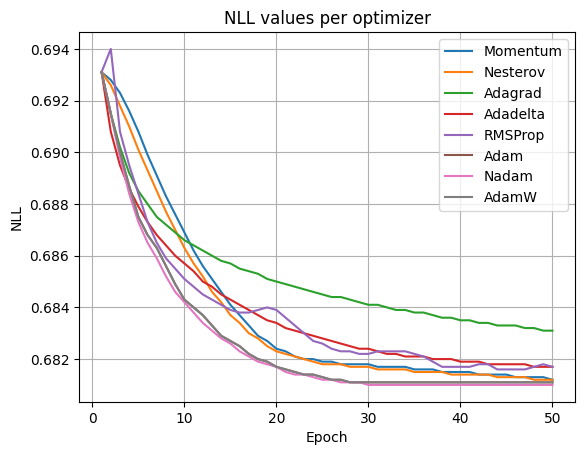

In [27]:
def train_test_all_optimizers(X_train, y_train_bin, X_test, y_test_bin, initial_weights, initial_bias, optimizers_dict, epochs=50):
    results = optimizer_test(X_train.tolist(), y_train_bin.tolist(), initial_weights, initial_bias, optimizers_dict, epochs=epochs)
    
    for name, res in results.items():
        w = torch.tensor(res['weights'], dtype=torch.float32).view(-1, 1)
        b = torch.tensor([res['bias']], dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
        z = X_test_tensor @ w + b
        y_pred_prob = 1 / (1 + torch.exp(-z))
        y_pred_class = (y_pred_prob >= 0.4).float()
        accuracy = (y_pred_class.view(-1) == y_test_bin).float().mean().item()
        print(f"{name}: Final NLL {min(res['nll'])} Accuracy {accuracy}")
        plt.plot(range(1, len(res['nll'])+1), res['nll'], label=name)
    
    plt.xlabel("Epoch")
    plt.ylabel("NLL")
    plt.title("NLL values per optimizer")
    plt.grid(True)
    plt.legend()
    plt.show()
    return results

initial_weights = [0.0] * X_train.shape[1]
initial_bias = 0.0
epochs = 50
optimizers_dict = {
    "Momentum": (Momentum, {"lr": 0.04, "momentum": 0.9}),
    "Nesterov": (Nesterov, {"lr": 0.04, "momentum": 0.9}),
    "Adagrad": (Adagrad, {"lr": 0.01, "eps": 1e-8}),
    "Adadelta": (Adadelta, {"rho": 0.99, "eps": 1e-6}),
    "RMSProp": (RMSProp, {"lr": 0.005, "rho": 0.9, "eps": 1e-8}),
    "Adam": (Adam, {"lr": 0.01, "betas": (0.9, 0.999), "eps": 1e-8}),
    "Nadam": (Nadam, {"lr": 0.01, "betas": (0.9, 0.999), "eps": 1e-8}),
    "AdamW": (AdamW, {"lr": 0.01, "betas": (0.9, 0.999), "eps": 1e-8, "weight_decay": 0.01})
}

results = train_test_all_optimizers(X_train_scaled, y_train_bin, X_test_scaled, y_test_bin, initial_weights, initial_bias, optimizers_dict, epochs)
